In [322]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#df1 = pd.read_csv("Cheapestelectriccars-EVDatabase.csv")
df1 = pd.read_csv("EVDatabase2nd.csv")
#df1 = pd.read_csv("Cheapestelectriccars.csv")

print(df1.columns.tolist())

df1=df1.fillna('0')

df1['Manufacturer'] = df1.Name.str.split(' ', 1, expand=True)[0]


PriceinIndia=[]
for item in df1['PriceinIndia']:
    PriceinIndia+=[int(item.replace('?','').replace(',',''))]
df1['PriceinIndia']=PriceinIndia

PriceinGermany=[]
for item in df1['PriceinGermany']:
    PriceinGermany+=[int(item.replace('€','').replace(',',''))]
df1['PriceinGermany']=PriceinGermany

PriceinUK=[]
for item in df1['PriceinUK']:
    PriceinUK+=[int(item.replace('£','').replace(',',''))]
df1['PriceinUK']=PriceinUK

FastChargeSpeed=[]
for item in df1['FastChargeSpeed']:
    FastChargeSpeed+=[int(item.replace(' km/h','').replace('-','0'))]
df1['FastChargeSpeed']=FastChargeSpeed

Efficiency=[]
for item in df1['Efficiency']:
    Efficiency+=[int(item.replace(' Wh/km',''))]
df1['Efficiency']=Efficiency

Range=[]
for item in df1['Range']:
    Range+=[int(item.replace(' km',''))]
df1['Range']=Range

TopSpeed=[]
for item in df1['TopSpeed']:
    TopSpeed+=[int(item.replace(' km/h',''))]
df1['TopSpeed']=TopSpeed

Acceleration=[]
for item in df1['Acceleration']:
    Acceleration+=[float(item.replace(' sec',''))]
df1['Acceleration']=Acceleration

Subtitle=[]
for item in df1['Subtitle']:
    Subtitle+=[float(item.replace('Battery Electric Vehicle | ','').replace(' kWh','').replace('      ',''))]
df1['Subtitle']=Subtitle



df1= df1.rename(columns = {'Subtitle':'KWH'})
df1.head()

['Name', 'Subtitle', 'Acceleration', 'TopSpeed', 'Range', 'Efficiency', 'FastChargeSpeed', 'Drive', 'NumberofSeats', 'PriceinGermany', 'PriceinUK', 'PriceinIndia']


,Name,KWH,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK,PriceinIndia,Manufacturer
0,Opel Ampera-e,58.0,7.3,150,335,173,210,Front Wheel Drive,5,42990,0,103435,Opel
1,Renault Kangoo Maxi ZE 33,31.0,22.4,130,160,194,0,Front Wheel Drive,5,0,31680,0,Renault
2,Nissan Leaf,36.0,7.9,144,220,164,230,Front Wheel Drive,5,29990,25995,67998,Nissan
3,Audi e-tron Sportback 55 quattro,86.5,5.7,200,375,231,600,All Wheel Drive,5,0,79900,276755,Audi
4,Porsche Taycan Turbo S,83.7,2.8,260,390,215,860,All Wheel Drive,4,186336,138830,256939,Porsche


In [323]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             180 non-null    object 
 1   KWH              180 non-null    float64
 2   Acceleration     180 non-null    float64
 3   TopSpeed         180 non-null    int64  
 4   Range            180 non-null    int64  
 5   Efficiency       180 non-null    int64  
 6   FastChargeSpeed  180 non-null    int64  
 7   Drive            180 non-null    object 
 8   NumberofSeats    180 non-null    int64  
 9   PriceinGermany   180 non-null    int64  
 10  PriceinUK        180 non-null    int64  
 11  PriceinIndia     180 non-null    int64  
 12  Manufacturer     180 non-null    object 
dtypes: float64(2), int64(8), object(3)
memory usage: 18.4+ KB


In [324]:
df1.corr()

,KWH,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,NumberofSeats,PriceinGermany,PriceinUK,PriceinIndia
KWH,1.000000,-0.622985,0.691415,0.890092,0.356426,0.659743,0.134447,0.598084,0.621253,-0.015715
Acceleration,-0.622985,1.000000,-0.821041,-0.712077,0.140984,-0.741670,0.318302,-0.501519,-0.674273,-0.070018
TopSpeed,0.691415,-0.821041,1.000000,0.760319,-0.047383,0.773190,-0.242567,0.678865,0.792669,-0.012734
Range,0.890092,-0.712077,0.760319,1.000000,-0.072273,0.767574,-0.068851,0.569037,0.620757,-0.005507
Efficiency,0.356426,0.140984,-0.047383,-0.072273,1.000000,-0.059914,0.602469,0.239221,0.084527,-0.038414
FastChargeSpeed,0.659743,-0.741670,0.773190,0.767574,-0.059914,1.000000,-0.119644,0.595609,0.650851,-0.012302
NumberofSeats,0.134447,0.318302,-0.242567,-0.068851,0.602469,-0.119644,1.000000,-0.012455,-0.211985,-0.088681
PriceinGermany,0.598084,-0.501519,0.678865,0.569037,0.239221,0.595609,-0.012455,1.000000,0.698753,-0.034754
PriceinUK,0.621253,-0.674273,0.792669,0.620757,0.084527,0.650851,-0.211985,0.698753,1.000000,-0.003584
PriceinIndia,-0.015715,-0.070018,-0.012734,-0.005507,-0.038414,-0.012302,-0.088681,-0.034754,-0.003584,1.000000


<AxesSubplot:>

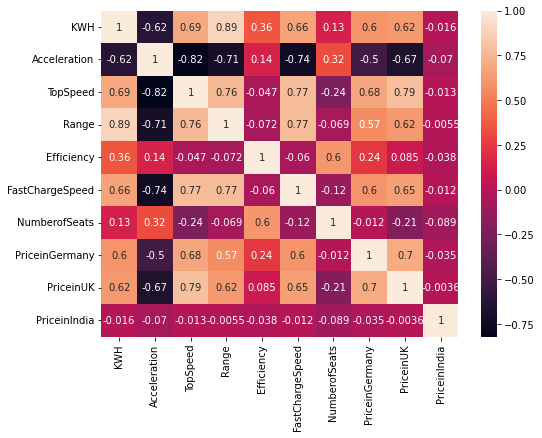

In [325]:
plt.figure(figsize=(8,6))
sns.heatmap(df1.corr(), annot=True)

<AxesSubplot:xlabel='Drive', ylabel='count'>

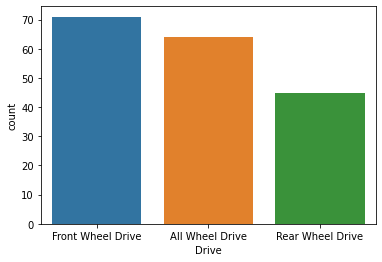

In [326]:
sns.countplot(x = 'Drive', data = df1)

<AxesSubplot:xlabel='NumberofSeats', ylabel='count'>

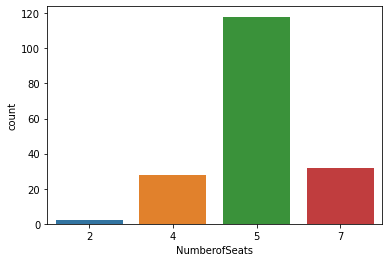

In [327]:
sns.countplot(x = 'NumberofSeats', data = df1)

<AxesSubplot:xlabel='NumberofSeats', ylabel='count'>

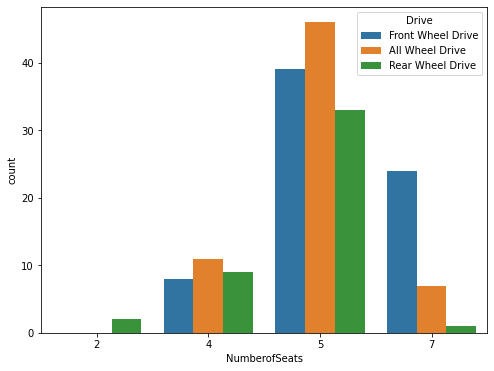

In [328]:
plt.figure(figsize=(8,6))
sns.countplot(x = 'NumberofSeats', hue='Drive', data=df1)

<AxesSubplot:xlabel='count', ylabel='Manufacturer'>

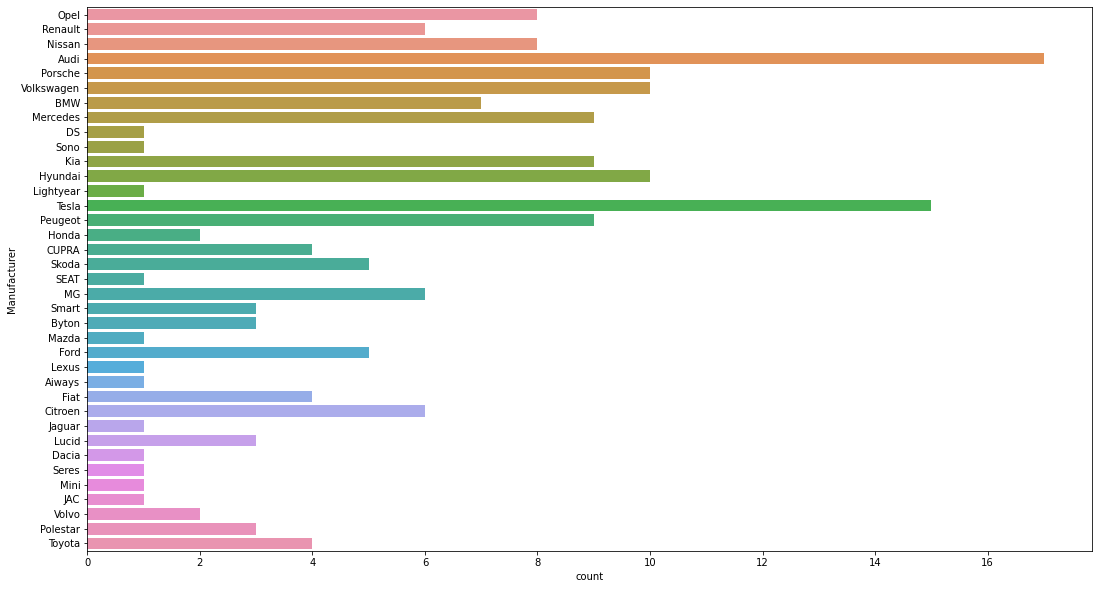

In [329]:
plt.figure(figsize=(18,10))
sns.countplot(y = 'Manufacturer', data = df1)

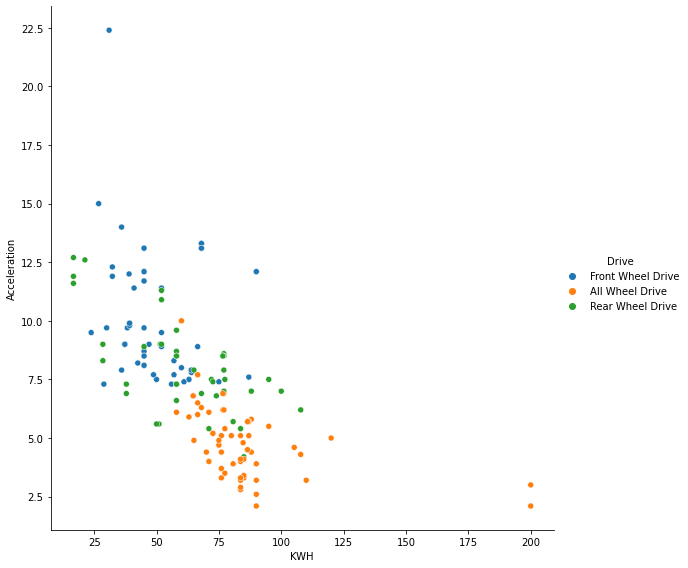

In [330]:
sns.relplot(x="KWH", y="Acceleration", height=8,hue="Drive",data=df1)

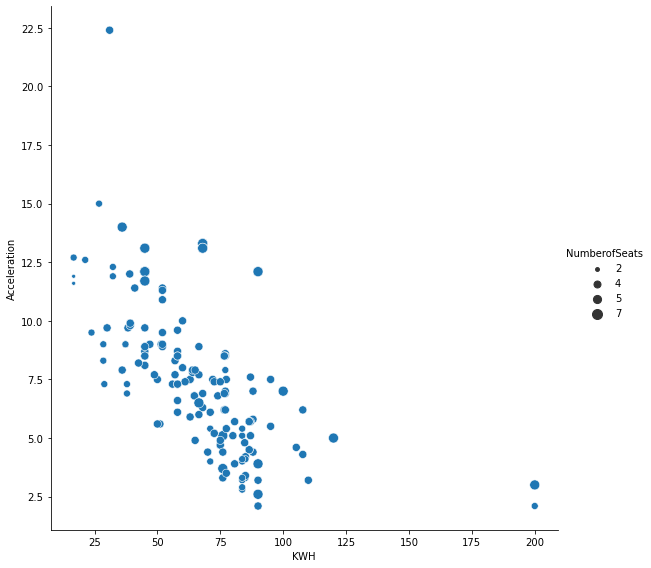

In [331]:
sns.relplot(x="KWH", y="Acceleration", size="NumberofSeats", height=8,sizes=(15, 100),data=df1)

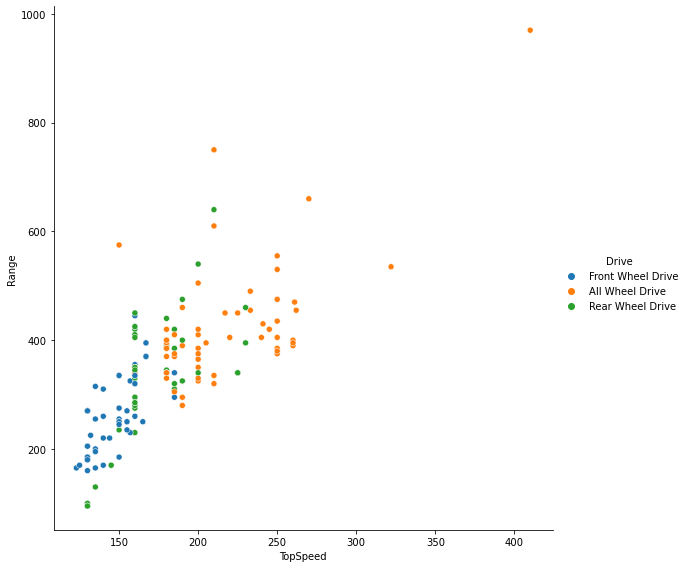

In [332]:
sns.relplot(x="TopSpeed", y="Range",height=8, hue="Drive",data=df1)

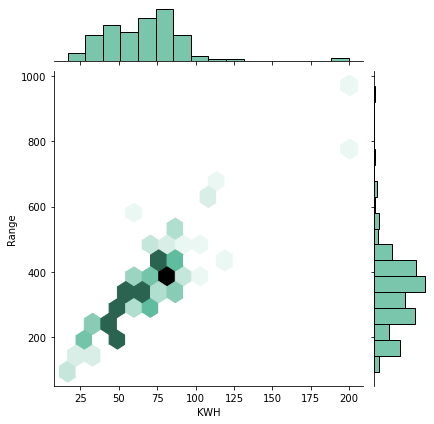

In [333]:
sns.jointplot(x=df1["KWH"], y=df1["Range"], kind="hex", color="#4CB391")

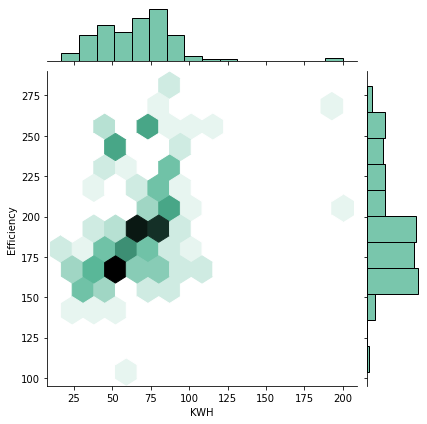

In [334]:
sns.jointplot(x=df1["KWH"], y=df1["Efficiency"], kind="hex", color="#4CB391")

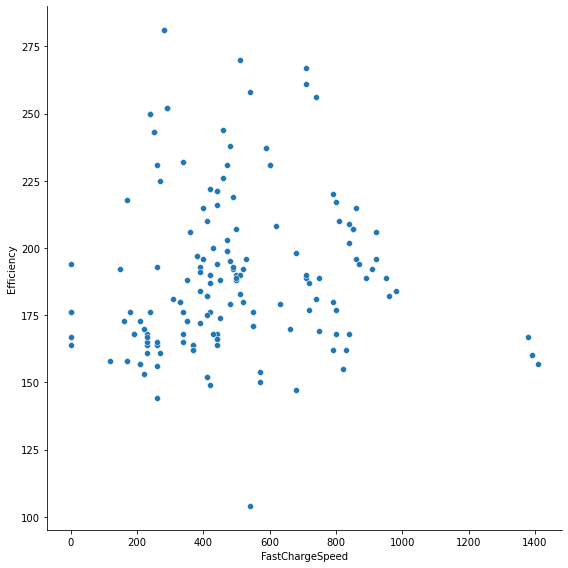

In [335]:
sns.relplot(x="FastChargeSpeed", y="Efficiency", height=8,data=df1)

In [336]:
c=0
for i in range(0, len(df1["PriceinUK"])):
    if (df1["PriceinUK"][i]==0):
        c+=1
print('Empty Values:',c)

Empty Values: 44


In [337]:
c=0
for i in range(0, len(df1["PriceinIndia"])):
    if (df1["PriceinIndia"][i]==0):
        c+=1
print('Empty Values:',c)

Empty Values: 20


In [338]:
import pandas as pd
pd.options.mode.chained_assignment = None

for i in range(0, len(df1["PriceinUK"])):
    if (df1["PriceinUK"][i]==0):
        val=df1["PriceinGermany"][i]*0.85
        df1["PriceinUK"][i]=val


In [339]:
import pandas as pd
pd.options.mode.chained_assignment = None

for i in range(0, len(df1["PriceinUK"])):
    if (df1["PriceinUK"][i]==0):
        val=df1["PriceinIndia"][i]*0.85
        df1["PriceinUK"][i]=val

In [340]:
import pandas as pd

pd.options.mode.chained_assignment = None

for i in range(0,len(df1['PriceinIndia'])):
    if(df1["PriceinIndia"][i]==0):
        val = df1['PriceinUK'][i]*0.89
        df1["PriceinIndia"][i]=val

In [341]:
import pandas as pd

pd.options.mode.chained_assignment = None

for i in range(0,len(df1['PriceinIndia'])):
    if(df1["PriceinIndia"][i]==0):
        val = df1['PriceinGermany'][i]*0.89
        df1["PriceinIndia"][i]=val

In [342]:
import category_encoders as ce
train_df=df1

encoder= ce.OrdinalEncoder(cols=['Drive'],return_df=True,
                           mapping=[{'col':'Drive',
                                     'mapping':{'Front Wheel Drive':1,'Rear Wheel Drive':2,'All Wheel Drive':3}}])


df_train = encoder.fit_transform(train_df)#Original data

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             180 non-null    object 
 1   KWH              180 non-null    float64
 2   Acceleration     180 non-null    float64
 3   TopSpeed         180 non-null    int64  
 4   Range            180 non-null    int64  
 5   Efficiency       180 non-null    int64  
 6   FastChargeSpeed  180 non-null    int64  
 7   Drive            180 non-null    int32  
 8   NumberofSeats    180 non-null    int64  
 9   PriceinGermany   180 non-null    int64  
 10  PriceinUK        180 non-null    int64  
 11  PriceinIndia     180 non-null    int64  
 12  Manufacturer     180 non-null    object 
dtypes: float64(2), int32(1), int64(8), object(2)
memory usage: 17.7+ KB


In [343]:
X= df_train.drop(['Name', 'PriceinGermany','PriceinUK','PriceinIndia','Manufacturer'], axis=1)
X=X.values

X

array([[ 58. ,   7.3, 150. , ..., 210. ,   1. ,   5. ],
       [ 31. ,  22.4, 130. , ...,   0. ,   1. ,   5. ],
       [ 36. ,   7.9, 144. , ..., 230. ,   1. ,   5. ],
       ...,
       [ 57. ,   7.7, 185. , ..., 340. ,   1. ,   5. ],
       [ 76.6,   6.9, 180. , ..., 470. ,   3. ,   5. ],
       [ 76.6,   8.5, 160. , ..., 520. ,   2. ,   5. ]])

In [344]:
#y=df_train['PriceinUK'].values
z=df_train['PriceinUK'].values
#z=df_train['PriceinIndia'].values
y=df_train['PriceinIndia'].values
#(180,8)
#(180,)

In [345]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=7)

In [346]:
from sklearn.ensemble import RandomForestRegressor
# create regressor object
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)


In [347]:
# fit the regressor with x and y data
regressor.fit(X_train, y_train)

y_pred= regressor.predict(X_test)

y_test

y_pred

array([163112.11972222, 165739.18151587, 239415.82      , 113943.89522222,
       230610.57055556, 209511.73555556, 147582.0925    , 171780.38288889,
       155630.11333333, 196202.82149206, 106332.11555556, 172910.08366667,
       189057.96266667, 176612.8       , 185920.12177778, 239427.69      ,
       208287.40972222, 135722.99722222, 233362.35516667, 224385.32222222,
        82590.65133333, 236425.57888889, 116578.14266667, 165739.18151587,
       201841.98888889, 232458.11051852, 190922.42388889, 207508.64944444,
       195105.61295238, 167646.15133333, 213198.71555556, 227459.12166667,
       111220.486     , 228374.86666667, 188825.83666667, 143281.70094444,
       164362.09888889, 197317.34861111, 170387.12333333, 205215.36083333,
       111220.486     , 218305.03277778, 186437.81113492, 217959.51388889,
       165739.18151587, 208987.00333333, 186861.46420635, 163715.25117965,
       155926.59388889, 199404.62611111, 158735.37388889, 151470.63166667,
       181943.25555556, 1

In [348]:
from sklearn.metrics import mean_absolute_error
print("MAE: ",abs(mean_absolute_error(y_test,y_pred)))



MAE:  68689.0132079285


In [352]:
#Mean Squared Error(MSE)
from sklearn.metrics import mean_squared_error
print("MSE: ",mean_squared_error(y_test,y_pred))

MSE:  81298.37887411202


In [350]:
#Root Mean Squared Error(RMSE)
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred)))


RMSE:  81298.37887411202


In [351]:
#R Squared (R2)
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print("R2: ",r2)

R2:  -0.37568154296383827
